# RamachandranStatistics

Get measurement dict.

With a 2.5A cutoff, the No HB vs total is 30.5%
With a 2.8A cutoff, the No HB vs total is 28.5%

In [1]:
import tarfile
import json

filename = '../../mollib/data/ramachandranstatistics/measurements.tar'
tfile = tarfile.open(name=filename, mode='r')
measurement_dict = {}

with tfile:
    # Extract the files
    for member in tfile.getmembers():
        f= tfile.extractfile(member)
        try:
            identifier = member.name.strip('.json')
            string = f.read().decode()
            return_dict = json.loads(string)
            measurement_dict[identifier] = return_dict
        except KeyError:
            continue
        finally:
            f.close()

In [2]:
len(measurement_dict)

11369

In [4]:
import numpy as np

results = {}
for identifier, return_dict in measurement_dict.items():
    for classification, phi_psi_list in return_dict.items():
        l = results.setdefault(classification, list())
        phi_psi_list = [(i,j) for i,j in phi_psi_list if isinstance(i, float) and isinstance(j, float)]
        l.extend(phi_psi_list)

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

plt.style.reload_library()
plt.style.use(['publication', '1col'])
plt.rcParams['image.cmap'] = 'Blues_r'

phi_list = []
psi_list = []
# Create and Overall dataset
for classification, phi_psi in results.items():
    phi, psi = zip(*phi_psi)
    phi_list += phi
    psi_list += psi

results['Overall'] = zip(phi_list, psi_list)
    
print(len(results))
print(results.keys())
print(sum([len(v) for v in results.values()]))

16
[u'alpha-helix', u'alpha-helix__C-term', u'sheet', u"type I' turn", u'type I turn', 'Overall', u'isolated', u'Gly__C-term', u'Gly', u'Gly__N-term', u'alpha-helix__N-term', u'310-helix', u"type II' turn", u'No hydrogen bonds', u'pi-helix', u'type II turn']
10013764


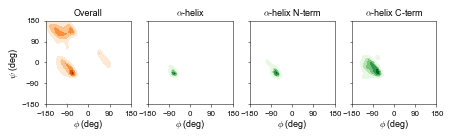

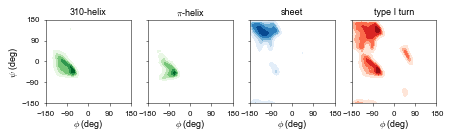

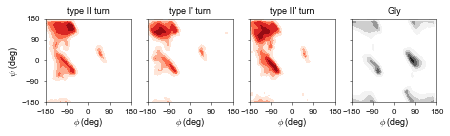

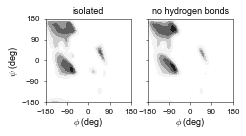

In [89]:
from itertools import izip_longest as zip_longest
import matplotlib.pyplot as plt

plt.style.reload_library()
plt.style.use(['publication'])

figsize=(7,1.5)

from matplotlib import rcParams 
rcParams.update({'figure.autolayout':False})

# Define the plots. These are organized by keys in results and the corresponding color map.
labels = (('Overall', plt.cm.Oranges_r),
          ('alpha-helix', plt.cm.Greens_r),
          ('alpha-helix__N-term', plt.cm.Greens_r),
          ('alpha-helix__C-term', plt.cm.Greens_r),
          ('310-helix', plt.cm.Greens_r),
          ('pi-helix', plt.cm.Greens_r),
          ('sheet', plt.cm.Blues_r),
          ('type I turn', plt.cm.Reds_r),
          ('type II turn', plt.cm.Reds_r),
          ("type I' turn", plt.cm.Reds_r),
          ("type II' turn", plt.cm.Reds_r),
          ('Gly', plt.cm.Greys_r),
          ('isolated', plt.cm.Greys_r),
          ('No hydrogen bonds', plt.cm.Greys_r),
           )

def grouper(n, iterable, fillvalue=None):
    "grouper(3, 'ABCDEFG', 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)

subfigure_groups = list(grouper(4,labels))

for row, subfigure_labels in enumerate(subfigure_groups, 1):
    f, axarr = plt.subplots(1,len(subfigure_labels), sharey=True, figsize=figsize)
    axarr[0].set_ylabel(r'$\psi$ (deg)')
    
    for count, values in enumerate(subfigure_labels):
        # Skip empty plots
        if values is None:
            axarr[count].axis('off')
            axarr[count].set_visible(False) 
            continue
        label, cmap = values
        
        axarr[count].set_title(label.replace('__', ' ')
                                    .replace('alpha', "$\\alpha$")
                                    .replace('pi', "$\\pi$")
                                    .replace('No', 'no'),
                               size=9)
        axarr[count].set_xlabel(r'$\phi$ (deg)')

        axarr[count].xaxis.set_ticks(np.arange(-180, 181, 90))
        axarr[count].set_xlim(-180, 180)
        axarr[count].yaxis.set_ticks(np.arange(-180, 181, 90))
        axarr[count].set_ylim(-180, 180)

        axarr[count].get_xaxis().tick_bottom()
        axarr[count].get_yaxis().tick_left()

        phi_psi = results[label]
        x,y = zip(*phi_psi)

        x = np.array(x)
        y = np.array(y)
        hist2d, x, y = np.histogram2d(y, x, bins=36, range=np.array([(-180., 190.), (-180., 190.)]))
        hist2d = -1.*np.log(hist2d + 0.1)

        minimum = np.min(hist2d)
        hist2d -= minimum
        
        levels = np.arange(0.0, 5.1, 1.0)

        axarr[count].contourf(x[:-1], y[:-1], hist2d, levels, cmap=cmap)
        
        plt.savefig('ramachandran_countour_{}.png'.format(row), format='PNG', 
                    dpi=1200, bbox_inches='tight', pad_inches=0.05)
        plt.savefig('ramachandran_countour_{}.svg'.format(row), format='SVG', 
                    bbox_inches='tight', pad_inches=0.05)
        
    plt.show()
        


# HbondStatistics

In [2]:
import tarfile
import json

filename = '../mollib/data/hbondstatistics/measurements.tar'
tfile = tarfile.open(name=filename, mode='r')
measurement_dict = {}

with tfile:
    # Extract the files
    for member in tfile.getmembers():
        f= tfile.extractfile(member)
        try:
            identifier = member.name.strip('.json')
            string = f.read().decode()
            return_dict = json.loads(string)
            measurement_dict[identifier] = return_dict
        except KeyError:
            continue
        finally:
            f.close()

In [3]:
len(measurement_dict)

11369

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4
  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5]
overall


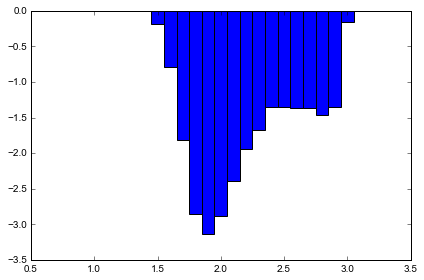

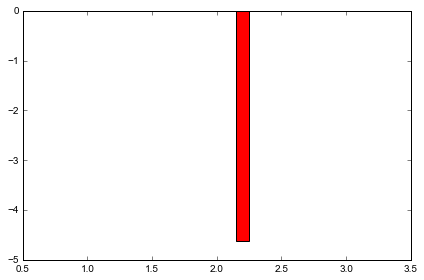

sc-bb amide


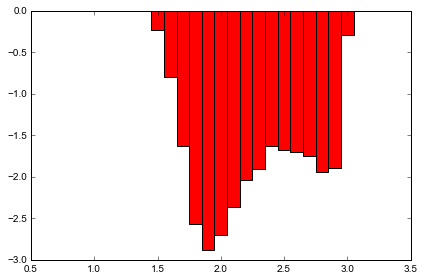

sc-bb hydroxyl


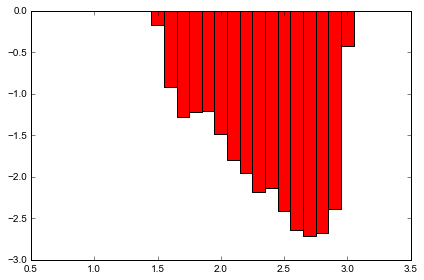

overall


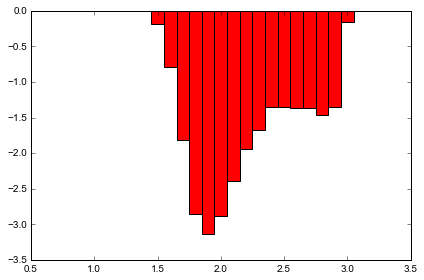

sc-sc amide


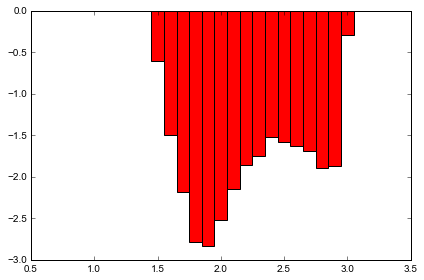

bb-sc amide


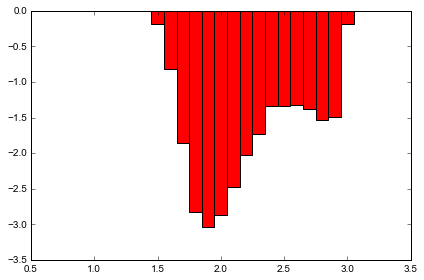

sc-sc hydroxyl


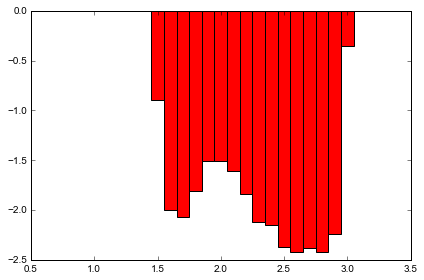

bb-bb amide


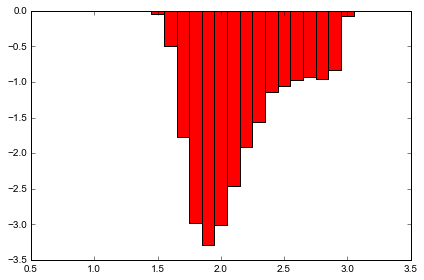

In [22]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

d1a1 = {}
for identifier, return_dict in measurement_dict.items():
    for classification, hbond_dict_list in return_dict.items():
        major, minor, modifier = classification.split('__')
        dists = d1a1.setdefault(major, list())
        d1a1_dists = [d['distances']['d1a1'] for d in hbond_dict_list]
        dists += d1a1_dists
        
        overall = d1a1.setdefault('overall', list())
        overall += d1a1_dists

hist_range = (1.0, 3.5)
bins = 25

hist1d, edges = np.histogram(overall, bins=bins, range=hist_range, density=True)
np.savez('overall' + '.npz', edges, hist1d,)
print(edges)

E = hist1d*0.1
E = -1.*np.log(hist1d + 0.1)
maximum = np.max(E)
E -= maximum
print('overall')
plt.bar(edges[0:-1], E, width=(hist_range[1]-hist_range[0])/bins, align='center', color='blue')
plt.show()

# for classification, d1a1_dists in d1a1.items():
#     hist1d, edges = np.histogram(d1a1_dists, bins=bins, range=hist_range, density=True)
#     np.savez(classification + '.npz', edges, hist1d,)
    
#     E = -1.*np.log(hist1d + 0.1)
#     maximum = np.max(E)
#     E -= maximum
    
#     print(classification)
    
#     plt.bar(edges[0:-1], E, width=(hist_range[1]-hist_range[0])/bins, align='center', color='red')
#     plt.show()